# Título: 
Clasificación de imágenes con Redes Neuronales Convolucionales.


# Integrantes: 
Falcone Oscar Andres, Zini Jesus Andres.

# Modalidad: 
Aplicación de IA.


# Objetivo del trabajo:
- Tarea: Algoritmo de clasificación de números escritos a mano.
- Tipo de red neuronal: Red neuronales convolucionales.
- Objetivo: Desarrollar nuestra primera aplicación de Machine Learning y profundizar en el estudio de distintas configuraciones de redes neuronales, sus modelos y funciones.

# Recursos a utilizar:

- DATASET: Base de datos MNIST (Números escritos a mano, etiquetados) http://yann.lecun.com/exdb/mnist/ "The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."

- CODIGO: Python, TensorFlow, TensorFlow.js, JavaScript, HTML, CSS.

- DESPLIEGUE: GitHub Pages


In [ ]:
# importamos tensorflow y tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# descargamos el set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# imprimimos los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [ ]:
# mostramos 5 ejemplos del set a modo de testeo de la carga de MNIST
tfds.as_dataframe(datos['train'].take(5), metadatos)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


In [ ]:
# obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
# obtenemos las etiquetas de las 10 categorias posibles (números del 0 al 9)
nombres_clases = metadatos.features['label'].names
# vemos dichas etiquetas
nombres_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# normalizamos los datos a través de la función de normalización (pasa valores de los píxeles de 0-255 a 0-1)
# de esta forma la red aprende mas rápido y mejor (https://www.quora.com/Why-do-we-normalize-data-in-machine-learning)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # pasamos de 0-255 a 0-1
  return imagenes, etiquetas

# normalizamos los datos de entrenamiento y pruebas con la funcion
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# agregamos a caché (usa memoria en lugar de disco, resulta en un entrenamiento más rápido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

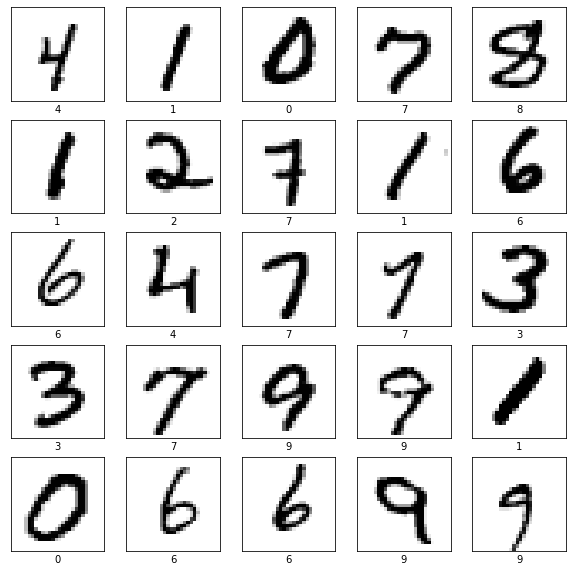

In [ ]:
import matplotlib.pyplot as plt

# visaulizamos nuevamente algunos datos de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

# Creación de los modelos

En esta etapa creamos tres arquitecturas distintas para analizar su aprendizaje y posteriormente su precisión en las predicciones.

### Las tres arquitecturas que analizamos son las siguientes:

- Modelo Regular Denso.

- Modelo Convolucional.

- Modelo Convolucional con técnica de Dropout.




# Modelo Regular Denso.

El modelo regular denso que configuramos posee 784 neuronas en la capa de entrada. Esto es así porque cada imagen de entrada va a ser un cuadro de 28 x 28 píxeles. La capa de tipo Flatten se encarga de convertir la matriz de 28 x 28 a un arreglo de 785 píxeles.

Configuramos además dos capas ocultas de 50 neuronas cada una.

El modelo se denomina denso puesto que las neuronas de cada capa conectan hacia todas las neuronas de la siguiente capa. 

Por último, una capa de salida de 10 neuronas, dado que el objetivo de nuestra clasificación tiene como resultado diez valores distintos. 

In [ ]:
# modelo regular denso
modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 canal - blanco y negro
  tf.keras.layers.Dense(units=50, activation='relu'), # capa oculta con funcion de activacion "relu"
  tf.keras.layers.Dense(units=50, activation='relu'), 
  
  # capa salida, funcion de activacion "softmax" para que nos de la predicción (en redes de clasificacion)
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

# Modelo Convolucional

El modelo convolucional intenta descubrir patrones o características dentro de las imágenes en lugar de analizarlas pixel a pixel como el caso anterior (regular denso). Para esto, la arquitectura de convolución hace uso de dos tipos de capas ocultas especiales, la capa de convolución y la capa de agrupación máxima.

Para la capa de convolución, se utiliza la función Conv2D donde el primer parámetro (32) indica cuantos núcleos/filtros (https://en.wikipedia.org/wiki/Kernel_(image_processing)) diferentes se van a utilizar (los valores son aleatorios porque una capa de convolución ajusta los valores de las casillas de los núcleos de manera automática). 
El segundo parámetro (3,3) indica el tamaño de los núcleos (3x3).
El tercer parámetro, indica el tamaño de la imagen de entrada (28x28) y su número de canales (1 porque vamos a utilizar solo blanco y negro).

Para la capa de agrupación máxima, se usa la función MaxPooling2D (https://keras.io/api/layers/pooling_layers/max_pooling2d/). Existen distintos tipos de capa de agrupación máxima, pero esta es la más utilizada actualmente.



In [ ]:
# modelo convolucional
modeloConv = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # a medida que avanzamos se van agregando mas filtros en las capas de convolucion
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=100, activation='relu'),

  # capa de salida
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Modelo convolucional con técnica de Dropout

Dropout es una de las técnicas de optimización que se pueden utilizar en las redes neuronales convolucionales. Se aplica la función de Dropout con un valor de 0.5, para que en cada iteración/época cada neurona tenga 50% de probabilidades de estar viva, esto hace que todas las neuronas entrenen en igual medida.
En general la arquitectura es similar al modelo convolucional, agregándose la siguiente línea `tf.keras.layers.Dropout(0.5),`

In [ ]:
# modelo convolucional con técnica de dropout
modeloConvDrop = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # función que aplica la tecnica de dropout
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=100, activation='relu'),

  # capa de salida
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilación de los modelos

En el siguiente box se realiza la compilación de los tres modelos.

Utilizamos la función de optimización Adam que permite ajustar los pesos de manera eficiente para que las neuronas vayan mejorando y no empeorando (o sea que aprenda).

La función de pérdida a utilizarse es SparseCategoricalCrossentropy (se usa en las redes de clasificación).

In [ ]:
modeloDenso.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modeloConv.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modeloConvDrop.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Ajuste de propiedades a los datos de entrenamiento y prueba

A continuación, se van a ajustar algunas propiedades de los datos de entrenamiento y prueba.

El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera más rápida. Definimos un tamaño de lote de 36 y con la función `batch` configuramos ese tamaño en los sets de datos.

Como daremos varias vueltas al set de datos en el entrenamiento, queremos que se haga de manera aleatoria y no siempre en un mismo orden. `Shuffle` y `repeat` hacen que los datos estén mezclados de manera aleatoria para que la red no se vaya a aprender el orden que este tiene.

Con los datos de prueba solo es necesario utilizar la función `batch`.


In [ ]:
# definimos los números de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

# definimos el tamaño del lote
TAMANO_LOTE = 36

# ajustamos las propiedades
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
# imprimimos los números de datos en entrenamiento y pruebas (60k y 10k) para corroborar
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


# Entrenamiento y TensorBoard

La variable de TensorBoard se envía en el arreglo de "callbacks". También definimos un directorio donde guardar la información de la red entrenando en cada época, de manera que después TensorBoard los pueda leer para hacer gráficas.

Para entrenar se usa la función `fit`. Indicamos datos de entrada y resultados esperados y le decimos cuantas vueltas queremos que itere (epochs). En este caso se utilizaremos diez épocas.
Se puede apreciar la precisión y pérdida en cada vuelta o época a los datos.

In [ ]:
# importamos TensorBoard y math
from tensorflow.keras.callbacks import TensorBoard
import math


# Entrenamiento del Modelo Regular Denso


In [ ]:
# entrenamos el modelo regular denso
tensorboardDenso = TensorBoard(log_dir='logs/denso')
historialDenso = modeloDenso.fit(
    datos_entrenamiento, 
    epochs=10, 
    steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE), 
    callbacks=[tensorboardDenso]
  )


Epoch 1/10
1667/1667 [==============================] - 11s 2ms/step - loss: 0.3074 - accuracy: 0.9118
Epoch 2/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9579
Epoch 3/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9685
Epoch 4/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 5/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.0696 - accuracy: 0.9786
Epoch 6/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9815
Epoch 7/10
1667/1667 [==============================] - 6s 4ms/step - loss: 0.0497 - accuracy: 0.9842
Epoch 8/10
1667/1667 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 9/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 10/10
1667/1667 [==============================] - 4s 2ms/step - loss: 0.03

# Entrenamiento del Modelo Convolucional


In [ ]:
# entrenamos el modelo convolucional
tensorboardConv = TensorBoard(log_dir='logs/conv')
historialConv = modeloConv.fit(
    datos_entrenamiento, 
    epochs=10, 
    steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE), 
    callbacks=[tensorboardConv]
  )


Epoch 1/10
1667/1667 [==============================] - 14s 3ms/step - loss: 0.1302 - accuracy: 0.9599
Epoch 2/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9870
Epoch 3/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 4/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 5/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9946
Epoch 6/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 7/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 8/10
1667/1667 [==============================] - 6s 4ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 9/10
1667/1667 [==============================] - 6s 4ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 10/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.00

# Entrenamiento del Modelo Convolucional con Dropout


In [ ]:
# entrenamos el modelo convolucional con dropout
tensorboardConvDrop = TensorBoard(log_dir='logs/drop')
historialConvDrop = modeloConvDrop.fit(
    datos_entrenamiento, 
    epochs=10, 
    steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE), 
    callbacks=[tensorboardConvDrop]
  )


Epoch 1/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.1773 - accuracy: 0.9453
Epoch 2/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9784
Epoch 3/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9838
Epoch 4/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 5/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0377 - accuracy: 0.9884
Epoch 6/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 7/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 8/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 9/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.0230 - accuracy: 0.9920
Epoch 10/10
1667/1667 [==============================] - 6s 3ms/step - loss: 0.021

# Funciones para graficar las predicciones

In [ ]:
# las siguientes funciones son para pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja).
import numpy as np
import matplotlib.pyplot as plt
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 6
columnas = 6
num_imagenes = filas*columnas

# Resultados de predicciones del Modelo Regular Denso

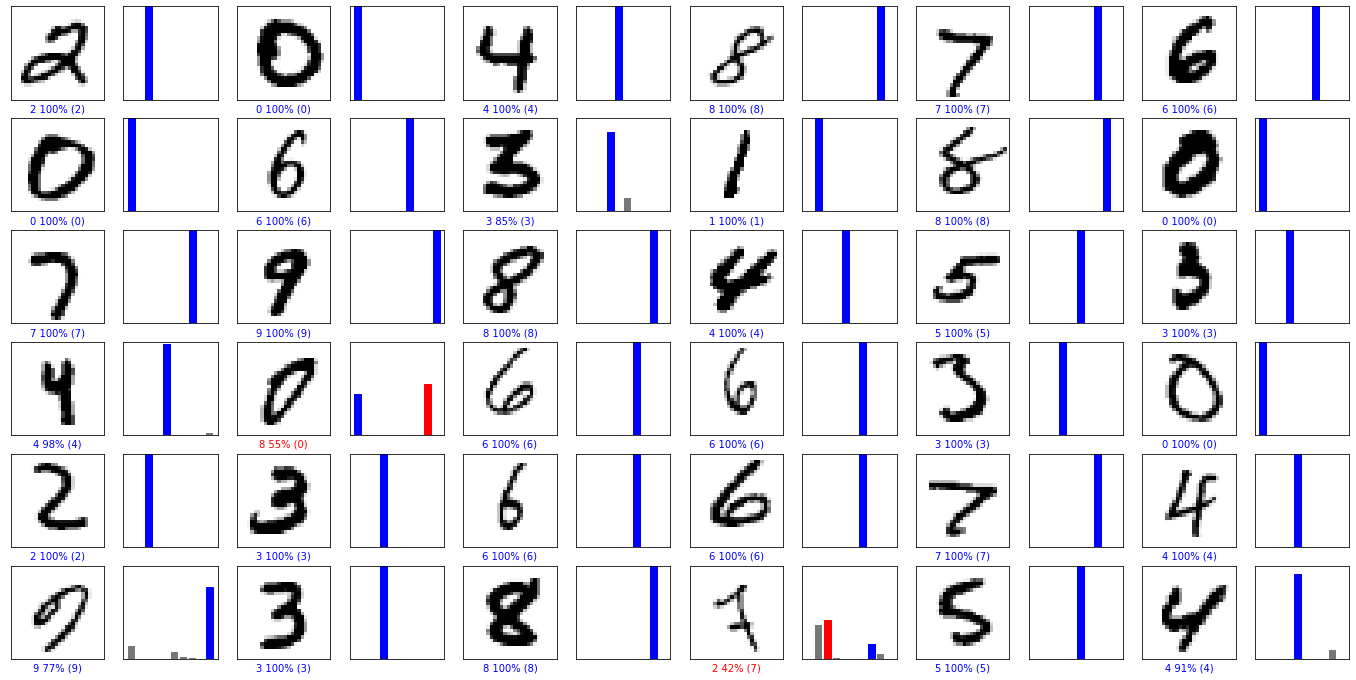

In [ ]:
# probamos el modelo regular denso
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modeloDenso.predict(imagenes_prueba)

plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

# Resultados de predicciones del Modelo Convolucional

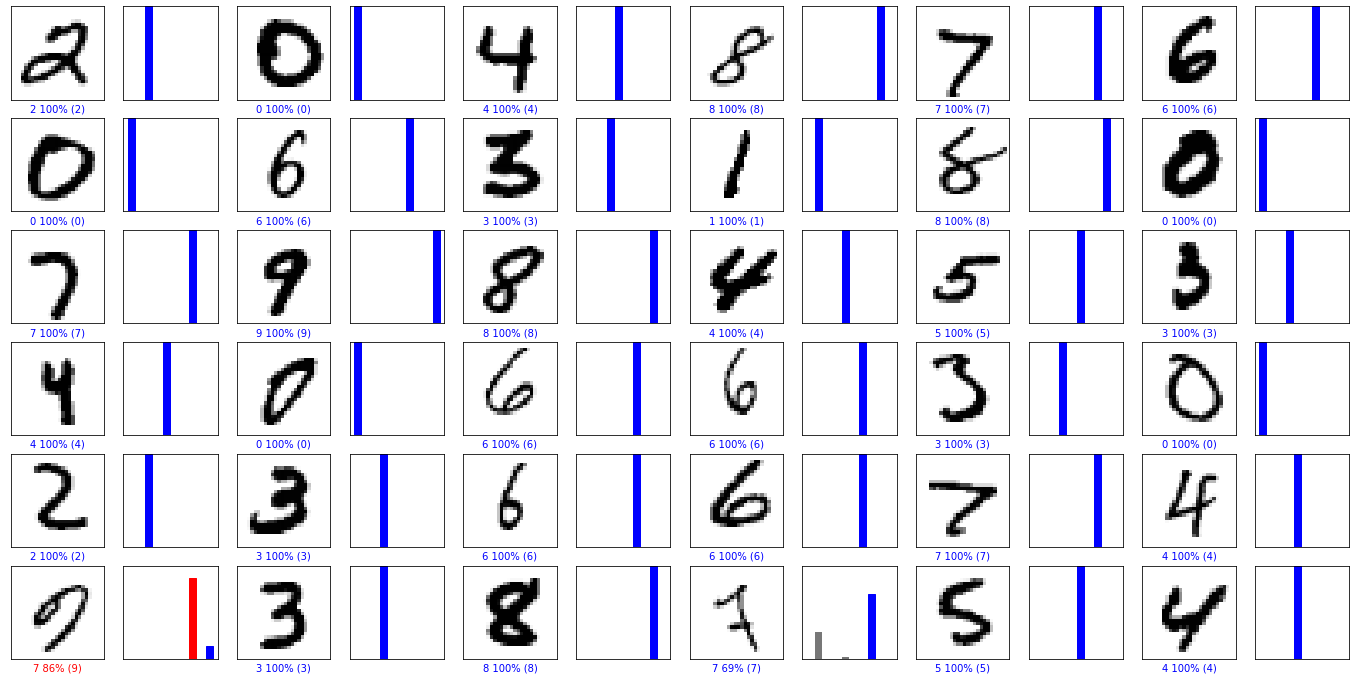

In [ ]:
# probamos el modelo convolucional
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modeloConv.predict(imagenes_prueba)

plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

# Resultados de predicciones del Modelo Convolucional con DropOut

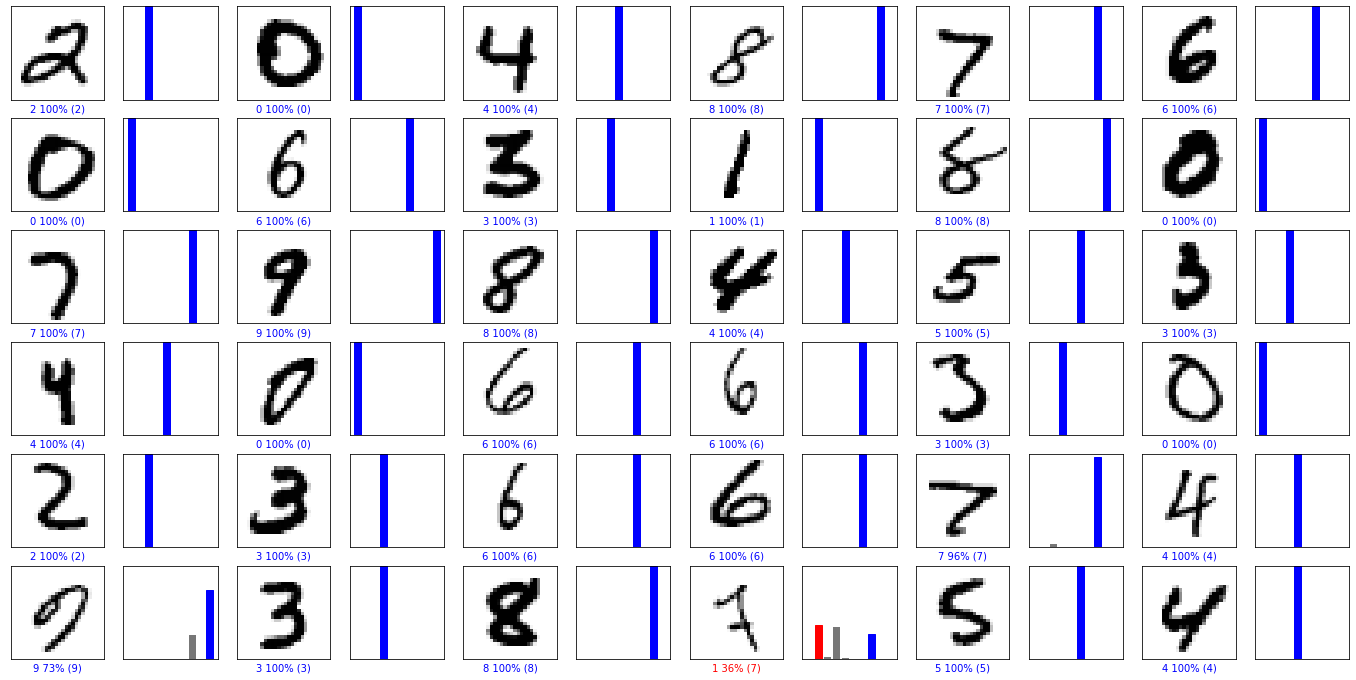

In [ ]:
# probamos el modelo convolucional con dropout
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modeloConvDrop.predict(imagenes_prueba)

plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

# TensorBoard

In [ ]:
# cargamos la extension de tensorboard de colab
%load_ext tensorboard

In [1]:
# ejecutamos tensorboard y le indicamos que lea la carpeta "logs"
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


# Conclusión

Como resultado de las pruebas realizadas, podemos concluir que, con estas configuraciones específicas, aunque las funciones de precición y pérdida ya son optimas en el segudo modelo, el modelo convolucional con optimización Dropout  resultó, como se esperaba, ser mas preciso a la hora de predecir los números del set de prueba.

Existe gran cantidad factores a la hora de entrenar una red neuronal, como el número de capas, el número de neuronas en cada capa, las funciones de optimización utilizadas, el overfitting que pueda llegar a tener la configuración, entre otros. Existe también infinidad de configuraciones a ser probadas en una red neuronal, y cuál de estas resulte ser la más optima va a depender exclusivamente del problema que se está tratando.


### Despliegue del modelo
Utilizaremos el último modelo para exportarlo y desplegarlo en una aplicación web.

In [ ]:
# exportamos el modelo
modeloConvDrop.save('modelo_exportado.h5')

In [ ]:
# instalamos tensorflowjs para convertir el .h5 a un modelo que pueda cargar tensorflowjs en un explorador
!pip install tensorflowjs

In [ ]:
# convertimos el archivo h5 a formato de tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

In [ ]:
# vemos el contenido de la carpeta
!ls tfjs_target_dir

group1-shard1of1.bin  model.json


### Link

- https://jesusandres31.github.io/ml-number-prediction/